In [19]:
import pandas as pd
import numpy as np
dat = r"C:\Users\steph\Downloads\encoded_df.csv"
df = pd.read_csv(dat)

# Split data

In [20]:
from sklearn.model_selection import train_test_split
headers = list(df.columns)
exc= ['id', 'relDate', 'minute']
ind_var= [x for x in headers if x not in exc]
print(ind_var)
dep_var = ["minute"]
df['bin_min'] = [0]*17313
for (x,y) in enumerate(df['minute']):
    if y>120:
        df.loc[x,'bin_min']= 1
    else:
        df.loc[x,'bin_min']=0


['date', 'rating', 'relCountry_Argentina', 'relCountry_Australia', 'relCountry_Brazil', 'relCountry_Canada', 'relCountry_China', 'relCountry_Czechia', 'relCountry_Denmark', 'relCountry_France', 'relCountry_Germany', 'relCountry_Greece', 'relCountry_Hong Kong', 'relCountry_India', 'relCountry_Italy', 'relCountry_Japan', 'relCountry_Mexico', 'relCountry_Netherlands', 'relCountry_Philippines', 'relCountry_Poland', 'relCountry_Portugal', 'relCountry_Russian Federation', 'relCountry_South Korea', 'relCountry_Spain', 'relCountry_Sweden', 'relCountry_Switzerland', 'relCountry_Turkey', 'relCountry_UK', 'relCountry_USA', 'type_Digital', 'type_Premiere', 'type_TV', 'type_Theatrical', 'type_Theatrical limited', 'studio_20th Century Fox', 'studio_ARD', 'studio_ARTE', 'studio_ARTE France Cinéma', 'studio_American Mutoscope & Biograph', 'studio_BBC', 'studio_BFI', 'studio_BR', 'studio_CNC', 'studio_Canal+', 'studio_Channel 4 Television', 'studio_Columbia Pictures', 'studio_DEFA', 'studio_Daiei Film'

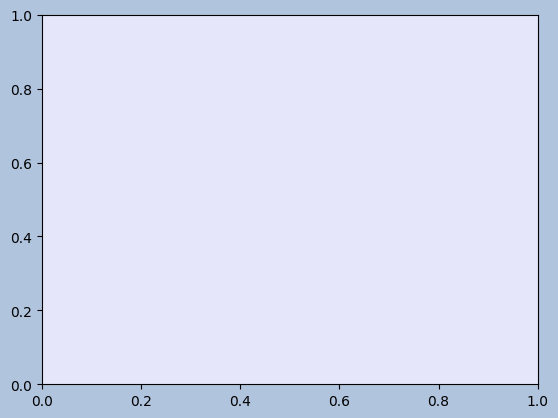

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

x = df[ind_var]
y = df['bin_min']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
df['Accuracy_bin'] = accuracy
k_values = [i for i in range (1,31)]
scores =[]
scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

[np.float64(0.7958814757576713), np.float64(0.8412201079898367), np.float64(0.8219878944751088), np.float64(0.8415090084116098), np.float64(0.8334811700083394), np.float64(0.8431838401268639), np.float64(0.8372353741033585), np.float64(0.8442811712761781), np.float64(0.8396031464422192), np.float64(0.844165631125976), np.float64(0.8397762398003621), np.float64(0.8446276415879813), np.float64(0.8404115438055817), np.float64(0.8450896353678976), np.float64(0.843299180091995), np.float64(0.846302439939057), np.float64(0.8444543146805887), np.float64(0.8484971356018638), np.float64(0.8464757001180926), np.float64(0.8497099735372018), np.float64(0.8479195849896562), np.float64(0.8496522535083685), np.float64(0.8481506486079715), np.float64(0.8495945001153566), np.float64(0.8487859692952802), np.float64(0.8499410705196955), np.float64(0.8491324896533511), np.float64(0.8507496013397718), np.float64(0.8501720674096536), np.float64(0.8516736723100505)]


Text(0, 0.5, 'Accuracy Score')

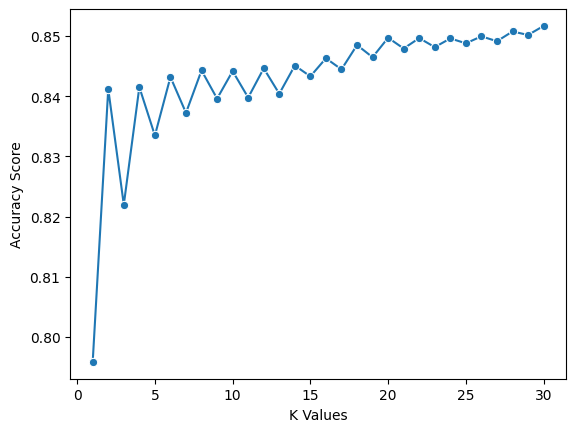

In [23]:
print(scores)
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")



In [24]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average = 'micro')
recall = recall_score(Y_test, y_pred, average = 'micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


NameError: name 'precision_score' is not defined